In [1]:
import sys
sys.path.append('..')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
['SimEvent', 'SimEvent/nEXO::EventObject', 'SimEvent/nEXO::EventObject/TObject', 'SimEvent/nEXO::EventObject/TObject/fUniqueID', 'SimEvent/nEXO::EventObject/TObject/fBits', 'SimEvent/fGenTheta_p', 'SimEvent/fGenPhi_p', 'SimEvent/fGenE', 'SimEvent/fParentTrackID', 'SimEvent/fNeutronCount', 'SimEvent/fXe137Count', 'SimEvent/fInitNeutronEnergy', 'SimEvent/fPMT_Hits', 'SimEvent/fPMTID', 'SimEvent/fPMTs_fired', 'SimEvent/fmu_Impact_parameter', 'SimEvent/fn_Impact_parameter', 'SimEvent/fTotalEventEner

"\nxpos_fine_all, ypos_fine_all = nexo_loader.scanning_points_fine(strip_x_coll, strip_y_coll, ystrips_coll)\nseen = set()\nduplicates = set()\nfor xi, yi in zip(xpos_fine_all, ypos_fine_all):\n    pair = (xi, yi)\n    if pair in seen:\n        duplicates.add(pair)\n    else:\n        seen.add(pair)\nxpos_fine, ypos_fine = zip(*[(xi, yi) for xi, yi in zip(xpos_fine_all, ypos_fine_all) if (xi, yi) not in duplicates])\nprint(f'Total {len(xpos_fine)} fine points to be scanned in this event.')\n"

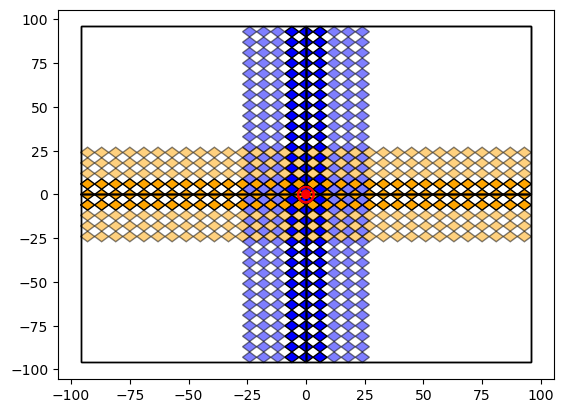

In [2]:
from nEXO_loader import loader
nexo_loader = loader()
nexo_loader.filename = '/Users/yumiao/Documents/Works/0nbb/nEXO/offline-samples/Baseline2019_bb0n_X0Y0Z-400mm_seed10_comsol.nEXOevents.root'
nexo_loader._load_event()

evtid = 2
nexo_loader._get_one_event(evtid)
nexo_loader._plot_topo2d(evtid, truthDepPos=True, noiseFlag=False)

times_coll, wfs_coll, strip_x_coll, strip_y_coll, ystrips_coll, qs_coll, tag_coll = nexo_loader.assembling_for_fitter(evtid, strip_type='coll')
print(f'{len(strip_x_coll)} collection channels in this event.')

xpos_all, ypos_all = nexo_loader.scanning_points(strip_x_coll, strip_y_coll, ystrips_coll)
seen = set()
duplicates = set()
for xi, yi in zip(xpos_all, ypos_all):
    pair = (xi, yi)
    if pair in seen:
        duplicates.add(pair)
    else:
        seen.add(pair)

xpos, ypos = [], []
for coor in seen:
   xpos.append(coor[0]) 
   ypos.append(coor[1]) 


#xpos, ypos = zip(*[(xi, yi) for xi, yi in zip(xpos_all, ypos_all) if (xi, yi) not in duplicates])
print(f'Total {len(xpos_all)} crossing pads to be fitted, {len(xpos)} after duplication checks.')


times, wfs, strip_x, strip_y, ystrips, qs, tag = nexo_loader.assembling_for_fitter(evtid, strip_type='all')
print(f'{len(strip_x)} collection+induction channels in this event.')

'''
xpos_fine_all, ypos_fine_all = nexo_loader.scanning_points_fine(strip_x_coll, strip_y_coll, ystrips_coll)
seen = set()
duplicates = set()
for xi, yi in zip(xpos_fine_all, ypos_fine_all):
    pair = (xi, yi)
    if pair in seen:
        duplicates.add(pair)
    else:
        seen.add(pair)
xpos_fine, ypos_fine = zip(*[(xi, yi) for xi, yi in zip(xpos_fine_all, ypos_fine_all) if (xi, yi) not in duplicates])
print(f'Total {len(xpos_fine)} fine points to be scanned in this event.')
'''

In [5]:
import numpy as np

recz = nexo_loader.Simple_Zrec(evtid)
print(f'The reconstructed z position is {recz} mm.')

zpos = [recz for i in range(len(xpos))]
Q0s = np.random.uniform(0, 1, len(xpos))
print(Q0s)
t0 = np.zeros(len(xpos))

n_param = 2 #4
init_par = []
for i in range(len(xpos)):
    #init_par.append(zpos[i])
    init_par.append(10.7)
    init_par.append(Q0s[i])
print(f'==> Total {len(init_par)/n_param:.0f} cluster are considered in this event.')

Passing time is 353.25 us, the rough drift distance is 600.525 mm.
The reconstructed z position is 600.525 mm.
[0.1390283  0.46955882 0.01639503 0.49584657 0.82486997 0.82767092
 0.96242743 0.70804468 0.85721699 0.65142039 0.13592381 0.80496357
 0.36325334 0.36794165 0.83116329 0.95105341 0.24812928]
==> Total 17 cluster are considered in this event.


In [9]:
from nEXO_event_processing import event_builder
builder = event_builder()
builder.set_filename(nexo_loader.filename)
builder.get_mc_event(evtid)
builder.group_channels()
print(builder.x_cross)
print(builder.y_cross)

['SimEvent', 'SimEvent/nEXO::EventObject', 'SimEvent/nEXO::EventObject/TObject', 'SimEvent/nEXO::EventObject/TObject/fUniqueID', 'SimEvent/nEXO::EventObject/TObject/fBits', 'SimEvent/fGenTheta_p', 'SimEvent/fGenPhi_p', 'SimEvent/fGenE', 'SimEvent/fParentTrackID', 'SimEvent/fNeutronCount', 'SimEvent/fXe137Count', 'SimEvent/fInitNeutronEnergy', 'SimEvent/fPMT_Hits', 'SimEvent/fPMTID', 'SimEvent/fPMTs_fired', 'SimEvent/fmu_Impact_parameter', 'SimEvent/fn_Impact_parameter', 'SimEvent/fTotalEventEnergy_WT', 'SimEvent/fEnergyDeposit_WT', 'SimEvent/fLengthDeposit_WT', 'SimEvent/fNumDeposits_WT', 'SimEvent/fEventNumber', 'SimEvent/fGenX', 'SimEvent/fGenY', 'SimEvent/fGenZ', 'SimEvent/fGenParticleID', 'SimEvent/fGenKineticE', 'SimEvent/fTotalEventEnergy', 'SimEvent/fNumDeposits', 'SimEvent/fLengthDeposit', 'SimEvent/fEnergyDeposit', 'SimEvent/fPreEnergyDeposit', 'SimEvent/fPostEnergyDeposit', 'SimEvent/fTrackNumber', 'SimEvent/fXpos', 'SimEvent/fYpos', 'SimEvent/fZpos', 'SimEvent/fTglob', 'SimE

In [3]:

import numpy as np
init_par = np.array([48, 6, 10.7, 1.0])


In [4]:
from waveform_fit import fitter
fit = fitter(SamplingFrequency=2.0)

fit.load_diffusion_PDFs()


The diffusion PDFs loaded successfully!


In [5]:
fixedNo = []
m = fit.multiChannel_variedCluster_fitting(times_coll, wfs_coll, init_par, strip_x_coll, strip_y_coll, ystrips_coll, fixedNo)
fit_params = m.values
print(m.values)
m


During minuit construction, there are 1 clusters.
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 0.240394 > 0
W MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -0.000185858
W MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.000404258
W MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.00795798
W MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.000937319
W MnPosDef Added to diagonal of Error matrix a value 0.507959
W VariableMetricBuilder gdel = -42404.2
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Machine accuracy limits further improvement
<ValueView x0=44.43694696609578 x1=2.8111664662470015 x2=38.03114374886528 x3=0.018827057170997415>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.956e+05                  │              Nfcn = 458              │
│ EDM = 0.000974 (Goal: 0.0002)    │            time = 0.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   44.44   │   0.29    │            │            │   28    │   68    │       │
│ 1 │ x1   │   2.81    │   0.31    │            │            │   -14   │   26    │       │
│ 2 │ x2   │   38.03   │   0.29    │            │            │   38    │   58    │       │
│ 3 │ x3   │  0.0188   │  0.0030   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        x0        x1        x2        x3 │
├────┼─────────────────────────────────────────┤
│ x0 │    0.0863   0.00991   -0.0153  0.000169 │
│ x1 │   0.00991    0.0947   -0.0103 -5.84e-05 │
│ x2 │   -0.0153   -0.0103    0.0364 -3.49e-05 │
│ x3 │  0.000169 -5.84e-05 -3.49e-05  8.74e-06 │
└────┴─────────────────────────────────────────┘

In [8]:
n_param = 2
fixedPar = np.arange(2, len(init_par), 2)
m = fit.multiCluster_fitting(times, wfs, xpos, ypos, init_par, strip_x, strip_y, ystrips, fixedNo=fixedPar)
fit_params = m.values

During minuit construction, there are 17 clusters.


Amplitudes for channel 0 are all 0.
(array([], dtype=int64),)
Amplitudes for channel 1 are all 0.
(array([], dtype=int64),)
Amplitudes for channel 2 are all 0.
(array([], dtype=int64),)
Amplitudes for channel 3 are all 0.
(array([], dtype=int64),)
Amplitudes for channel 4 are all 0.
(array([481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493,
       494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506,
       507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519,
       520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532,
       533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545,
       546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558,
       559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571,
       572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584,
       585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597,
       598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 

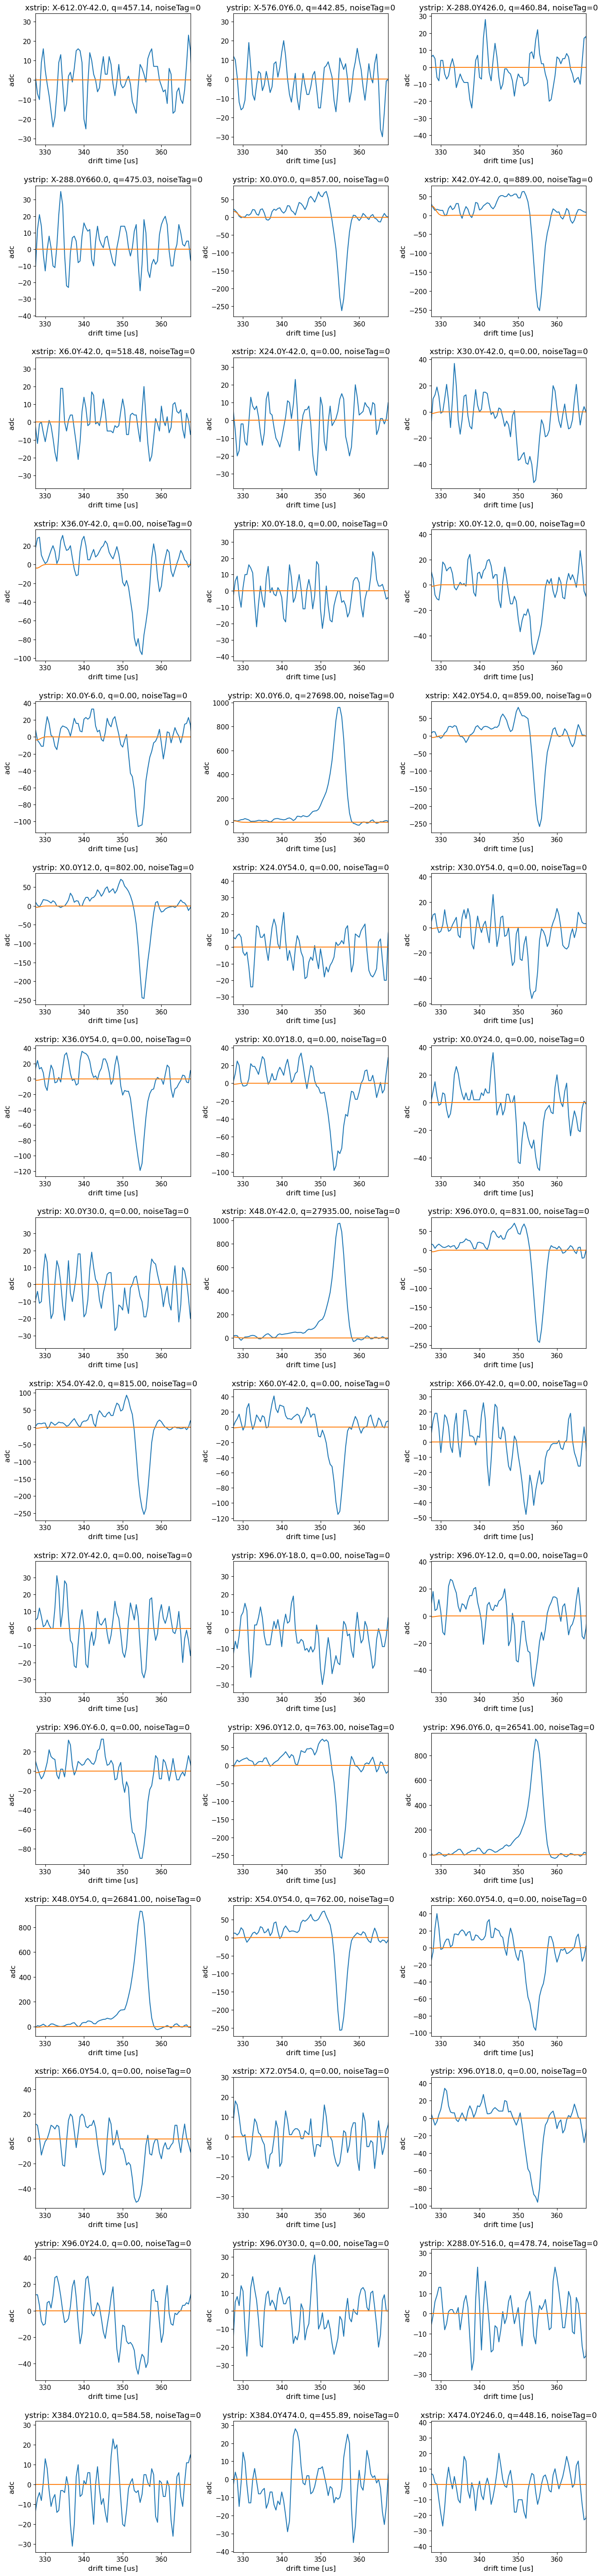

In [6]:

fit.multiCluster_manualtuning(times, wfs, [m.values[0]], [m.values[1]], [m.values[2], m.values[3]], strip_x, strip_y, ystrips, qs, tag)

In [10]:
fit_dt = np.array(m.values[::2])
fit_q = np.array(m.values[1::2])
xpos = np.array(xpos)
ypos = np.array(ypos)

fit_dt_filter = fit_dt[np.where(fit_q>1e-5)]
fit_q_filter = fit_q[np.where(fit_q>1e-5)]
xpos_filter = xpos[np.where(fit_q>1e-5)]
ypos_filter = ypos[np.where(fit_q>1e-5)]

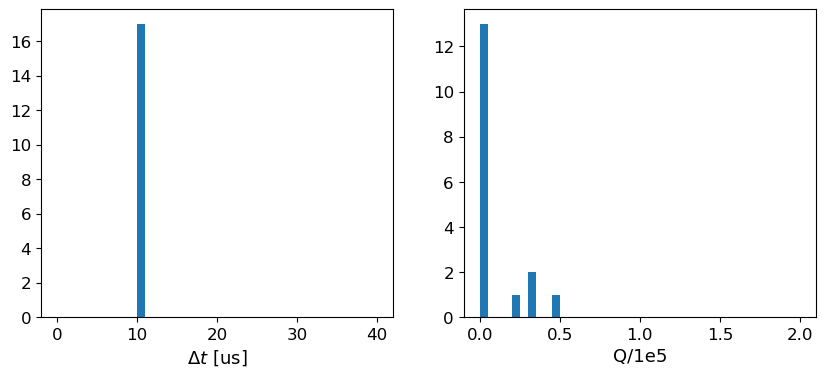

In [11]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(fit_dt, bins=40, range=(0, 40))
ax[1].hist(fit_q, bins=40, range=(0, 2))
ax[0].set_xlabel(r'$\Delta t$ [us]', fontsize=13)
ax[1].set_xlabel(r'Q/1e5', fontsize=13)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)

0.25514493694534296 0.037280942849104014 -1022.6790698232443


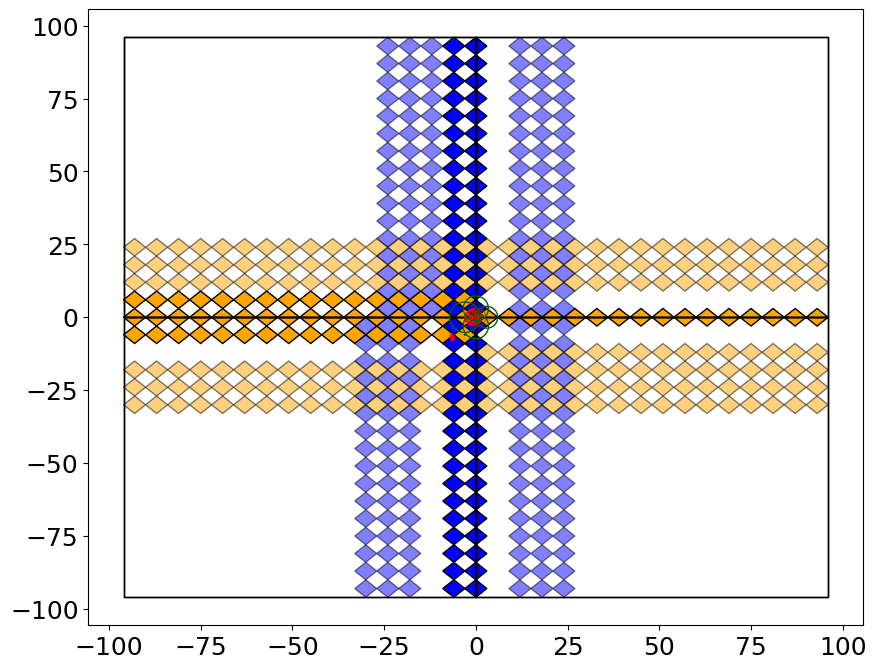

In [12]:
nexo_loader._plot_topo2d(evtid, truthDepPos=True, noiseFlag=False, fitPos={'x': xpos, 'y':ypos, 'q':fit_q})

In [12]:
print(fit_dt_filter)
print(fit_q_filter)
print(xpos_filter)
print(ypos_filter)

[10.7 10.7 10.7 10.7 10.7 10.7 10.7 10.7 10.7 10.7 10.7 10.7]
[3.78928902e-05 8.40962746e-02 3.62601673e-01 1.36304913e-02
 1.83965300e-05 2.93247767e-01 8.30146373e-03 1.58022419e-02
 3.42929669e-01 3.09400962e-01 1.01901649e-02 8.87135512e-03]
[ 0.  0.  9.  0.  0. 15. -3. -3. 12. 12. -6. -6.]
[39. 45. 48. 51. 57. 48. 42. 48. 45. 51. 39. 45.]


In [ ]:
print(np.sum(fit_q)*1e5)
print(np.sum(qs_coll))

157887.260060601
115593.0
